In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math


from helper import plot_cost_history, split_data, normalize, compute_loss, plot_features_to_value, compute_MAE
import regression
import params

compare the performance without each of the features (files minibatch_weights_no*.txt)
and the performance with all features (file minibatch_weights_all.txt)



In [19]:
# Load the data
data = pd.read_csv('dane.data', sep='\t', header=None)
print(data)

print("feature: min, max")
for i in range(data.shape[1]-1):
    print( i, data[i].min(), data[i].max())

idx = data.shape[1]-1
print("value: ", data[idx].min(), data[idx].max())

       0   1  2  3  4   5       6
0     13  30  2 -9  4  -2  235.53
1     13  55  2 -4 -2  -4  330.16
2     13  57  2  0 -2  -1  355.29
3     13  57  2  6  1   9  190.74
4     13  44  2  8 -5  -6  567.06
...   ..  .. .. .. ..  ..     ...
1994  59  32  7 -2 -3   1  506.64
1995  59  40  7  3 -2  -5  383.56
1996  59  34  7  5 -2   4  520.09
1997  59  32  7  6 -3 -10  275.48
1998  59  42  7  9  0   2  714.25

[1999 rows x 7 columns]
feature: min, max
0 13 59
1 30 59
2 2 7
3 -10 9
4 -5 4
5 -10 9
value:  -356.66 1260.63


In [20]:
# # prepare data

X = data.iloc[:, 0:6]
X = normalize(X)
X = X.values
Y = data.iloc[:, 6].values


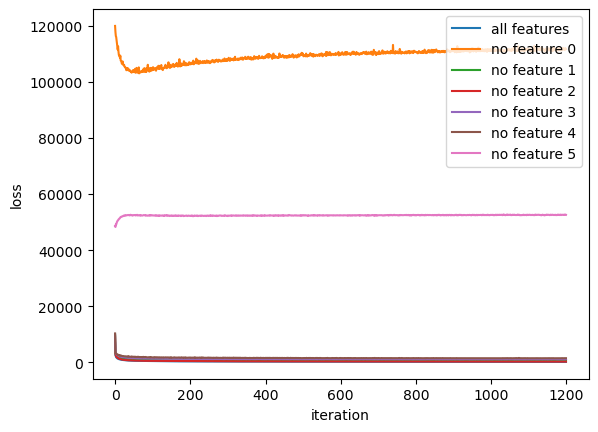

In [25]:
def modiify_X(X,k):
    if k != 0:
        X = np.delete(X, k-1, 1)
    
    new_params = np.zeros(X.shape[0])

    for i in range(X.shape[1]):
        for j in [4,8,2]:
            # add sin and cos of each feature
            new_params = np.c_[new_params, np.sin(j * X[:, i]*np.pi)/2 + 1/2, np.cos(j * X[:, i]*np.pi)/2 + 1/2]
        
    X = np.c_[X, new_params]

    new_params = np.zeros(X.shape[0])   

    for i in range(X.shape[1]):
        for j in range(i+1, X.shape[1]):
            new_params = np.c_[new_params, X[:, i] * X[:, j]]
            
    X = np.c_[X, new_params]

    X = np.c_[np.ones(X.shape[0]), X]
    
    return X

def predict(X, Y, k):
    
    X = modiify_X(X, k)
    
    # read weights from csv file
    # each row is a new iteration
    weights = np.genfromtxt('weights/minibatch_weights_no' + str(k) + '.csv', delimiter=',')    
    # predict
    result = [compute_loss(Y, np.dot(X, w)) for w in weights]
    return result    
    

# plot results


for j in range(7):
    X_copy = X.copy()
    result = predict(X_copy, Y, j)
    # if j == 1 or j ==  6:
        # continue
    if j == 0:
        plt.plot(result, label='all features')
    else:
        plt.plot(result, label='no feature ' + str(j-1))
    
plt.xlabel('iteration')
plt.ylabel('loss')    
plt.legend()
plt.show()
    

In [24]:
# Using scikit-learn to perform Linear Regression as a benchmark

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = pd.read_csv('dane.data', sep='\t', header=None)

# Split the data into training and testing sets (80% - 20%)

X_bench = data.iloc[:, 0:5]
y = data.iloc[:, 5]
print(X)
print(y)

X_benchtrain, X_benchtest, y_benchtrain, y_benchtest = train_test_split(X_bench, y, test_size=0.2, random_state=0)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_benchtrain, y_benchtrain)

# Make predictions
y_benchpred = model.predict(X_benchtest)

# Calculate the mean squared error
mse = mean_squared_error(y_benchtest, y_benchpred)
print("average diff: ", compute_MAE(y_benchtest, y_benchpred))
print('Mean Squared Error:', mse)

[[0.         0.         0.         0.05263158 1.         0.42105263]
 [0.         0.86206897 0.         0.31578947 0.33333333 0.31578947]
 [0.         0.93103448 0.         0.52631579 0.33333333 0.47368421]
 ...
 [1.         0.13793103 1.         0.78947368 0.33333333 0.73684211]
 [1.         0.06896552 1.         0.84210526 0.22222222 0.        ]
 [1.         0.4137931  1.         1.         0.55555556 0.63157895]]
0       -2
1       -4
2       -1
3        9
4       -6
        ..
1994     1
1995    -5
1996     4
1997   -10
1998     2
Name: 5, Length: 1999, dtype: int64
average diff:  4.97313199225298
Mean Squared Error: 32.52493778159224
